# *Оглавление*

## *1. [Задание 1](#task1)*
## *2. [Задание 2](#task2)*
## *3. [Задание 3](#task3)*  
###     *3.1 [Для южных городов](#task31)*  
###     *3.2 [Для северных городов](#task32)* 
   

## 1. Возьмите датасет Mortality and Water Hardness
<a id='task1'></a>
www.kaggle.com...r-hardness

Дополнительно будет выложен в ЛК
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_all = pd.read_csv('water.csv')
df_all.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [3]:
df_south = df_all[df_all['location'] == 'South']
df_north = df_all[df_all['location'] == 'North']

In [4]:
df_south.shape

(26, 5)

In [5]:
df_north.shape

(35, 5)

## 2. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
<a id='task2'></a>
- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

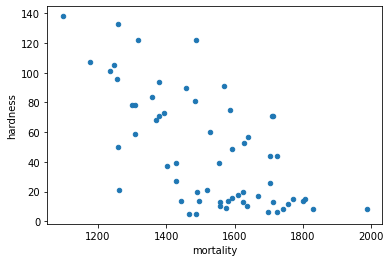

In [6]:
df_all.plot(kind='scatter', x='mortality', y='hardness')

На графике определенно визуализируется обратная корелляция смертности и жесткости воды - люди умирают больше там, где вода более мягкая.

In [7]:
df_all[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [8]:
df_all[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Оба коэффициента корреляции имеют значение -0,6 что подтверждает вывод, сделанный по визуализации.

#### Построим модель линейной регрессии.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
X = df_all[['hardness']]
y = df_all['mortality']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

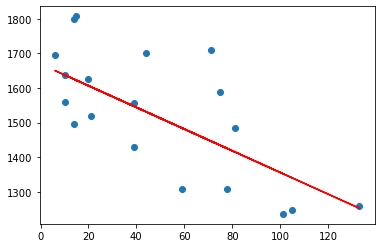

In [14]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [15]:
## Оцениваем на глаз
pd.DataFrame([y_test.values, model.predict(X_test)]).T

,0,1
0,1247.0,1340.146856
1,1558.0,1637.655589
2,1495.0,1625.128906
3,1702.0,1531.178779
4,1307.0,1424.701970
5,1625.0,1606.338880
6,1259.0,1252.460072
7,1587.0,1434.096982
8,1519.0,1603.207209
9,1696.0,1650.182272


In [16]:
# Рассчитаем коэффициент детерминации
model.score(X_test, y_test)

0.5046490611017092

По коэффициенту равному 0,5 можно оценить качество модели как среднее. Скорее всего необходимо либо больше данных, либо другой тип модели.

In [17]:
y_test = y_test.values

In [18]:
y_test

array([1247, 1558, 1495, 1702, 1307, 1625, 1259, 1587, 1519, 1696, 1309,
       1485, 1555, 1800, 1709, 1428, 1637, 1807, 1236], dtype=int64)

In [19]:
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [20]:
residuals = y_test - y_pred

In [21]:
chart = pd.DataFrame([residuals, y_pred]).T
chart.columns = ['residuals','y_pred']
chart

,residuals,y_pred
0,-93.146856,1340.146856
1,-79.655589,1637.655589
2,-130.128906,1625.128906
3,170.821221,1531.178779
4,-117.701970,1424.701970
5,18.661120,1606.338880
6,6.539928,1252.460072
7,152.903018,1434.096982
8,-84.207209,1603.207209
9,45.817728,1650.182272


Text(0, 0.5, 'Предсказанная смертность')

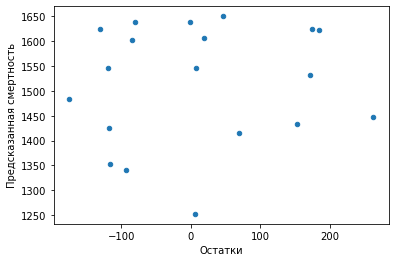

In [22]:
chart.plot(kind='scatter', x=0, y=1)
plt.xlabel('Остатки')
plt.ylabel('Предсказанная смертность')

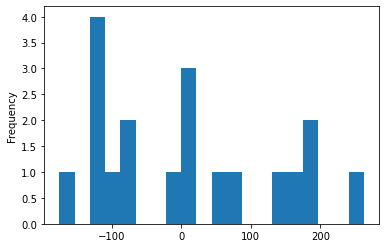

In [23]:
chart['residuals'].plot(kind='hist', bins=20)

In [24]:
chart.corr()

,residuals,y_pred
residuals,1.000000,0.095991
y_pred,0.095991,1.000000


Несмотря на то, что остатки хаотичны, связь отсутствует, но распределение не похоже на нормальное. Вероятно эта модель все же не подходит для таких данных и нельзя однозначно сказать больше ли люди умирают от мягкой воды.

## 3 Задание.
<a id='task3'></a>
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

### 3.1 Выясним, сохраняется ли аналогичная зависимость для южных городов?
<a id='task31'></a>

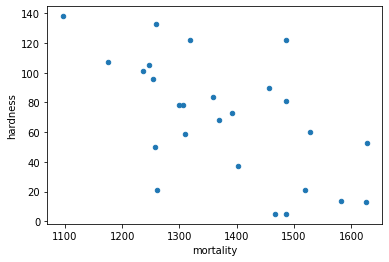

In [25]:
df_south.plot(kind='scatter', x='mortality', y='hardness')

На графике визуализируется обратная корелляция смертности и жесткости воды - люди умирают больше там, где вода более мягкая, но меньшая по сравнению с полным набором данных.

In [26]:
df_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [27]:
df_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


Оба коэффициента корреляции имеют значение около -0,6 что подтверждает вывод, сделанный по визуализации.

#### Построим модель линейной регрессии.

In [28]:
X = df_south[['hardness']]
y = df_south['mortality']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

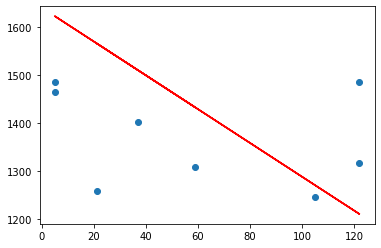

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [33]:
## Оцениваем на глаз
pd.DataFrame([y_test.values, model.predict(X_test)]).T

,0,1
0,1318.0,1211.582096
1,1486.0,1622.653314
2,1247.0,1271.310393
3,1486.0,1211.582096
4,1402.0,1510.223579
5,1260.0,1566.438447
6,1309.0,1432.928137
7,1466.0,1622.653314


In [34]:
# Рассчитаем коэффициент детерминации
model.score(X_test, y_test)

-2.551922301235205

По коэффициенту равному -2.55 можно оценить качество модели как хуже наивной. Необходимо либо больше данных, либо другой тип модели.

In [35]:
y_test = y_test.values

In [36]:
y_test

array([1318, 1486, 1247, 1486, 1402, 1260, 1309, 1466], dtype=int64)

In [37]:
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [38]:
residuals = y_test - y_pred

In [39]:
chart = pd.DataFrame([residuals, y_pred]).T
chart.columns = ['residuals','y_pred']
chart

,residuals,y_pred
0,106.417904,1211.582096
1,-136.653314,1622.653314
2,-24.310393,1271.310393
3,274.417904,1211.582096
4,-108.223579,1510.223579
5,-306.438447,1566.438447
6,-123.928137,1432.928137
7,-156.653314,1622.653314


Text(0, 0.5, 'Предсказанная смертность')

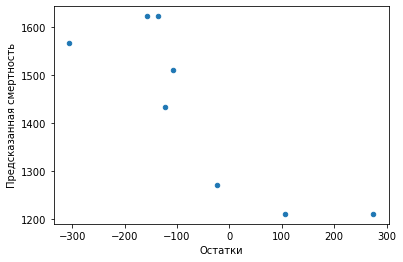

In [40]:
chart.plot(kind='scatter', x=0, y=1)
plt.xlabel('Остатки')
plt.ylabel('Предсказанная смертность')

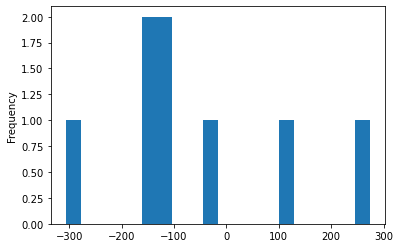

In [41]:
chart['residuals'].plot(kind='hist', bins=20)

In [42]:
chart.corr()

,residuals,y_pred
residuals,1.000000,-0.840259
y_pred,-0.840259,1.000000


В данном случае остатки не хаотичны, имеется ярко выраженная обратная связь, но распределение похоже на нормальное. Вероятно эта модель все же не подходит для таких данных.

### 3.2 Выясним, сохраняется ли аналогичная зависимость для северных городов?
<a id='task32'></a>

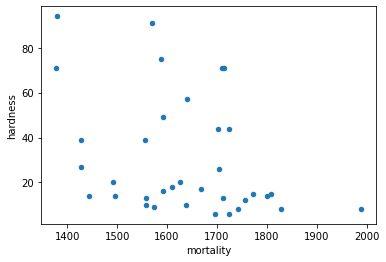

In [43]:
df_north.plot(kind='scatter', x='mortality', y='hardness')

На графике визуализируется обратная корелляция смертности и жесткости воды - люди умирают больше там, где вода более мягкая, но гораздо меньшая по сравнению с полным набором данных и определенно не линейная.

In [44]:
df_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [45]:
df_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


Оба коэффициента корреляции имеют значение около -0,36 ~ -0.4 что подтверждает вывод, сделанный по визуализации.

#### Построим модель линейной регрессии.

In [46]:
X = df_north[['hardness']]
y = df_north['mortality']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

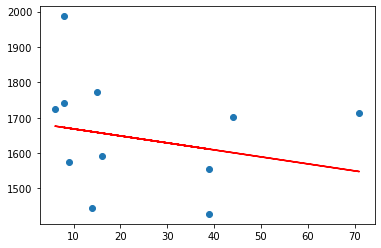

In [50]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [51]:
## Оцениваем на глаз
pd.DataFrame([y_test.values, model.predict(X_test)]).T

,0,1
0,1987.0,1672.335331
1,1574.0,1670.358469
2,1444.0,1660.474157
3,1724.0,1676.289055
4,1591.0,1656.520433
5,1713.0,1547.793009
6,1702.0,1601.168290
7,1742.0,1672.335331
8,1555.0,1611.052601
9,1772.0,1658.497295


In [52]:
# Рассчитаем коэффициент детерминации
model.score(X_test, y_test)

0.018885304285745863

По коэффициенту равному 0.019 можно оценить качество модели как практически равное наивной. Необходимо либо больше данных, либо другой тип модели.

In [53]:
y_test = y_test.values

In [54]:
y_test

array([1987, 1574, 1444, 1724, 1591, 1713, 1702, 1742, 1555, 1772, 1428],
      dtype=int64)

In [55]:
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [56]:
residuals = y_test - y_pred

In [57]:
chart = pd.DataFrame([residuals, y_pred]).T
chart.columns = ['residuals','y_pred']
chart

,residuals,y_pred
0,314.664669,1672.335331
1,-96.358469,1670.358469
2,-216.474157,1660.474157
3,47.710945,1676.289055
4,-65.520433,1656.520433
5,165.206991,1547.793009
6,100.831710,1601.168290
7,69.664669,1672.335331
8,-56.052601,1611.052601
9,113.502705,1658.497295


Text(0, 0.5, 'Предсказанная смертность')

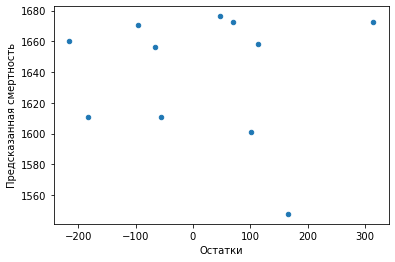

In [58]:
chart.plot(kind='scatter', x=0, y=1)
plt.xlabel('Остатки')
plt.ylabel('Предсказанная смертность')

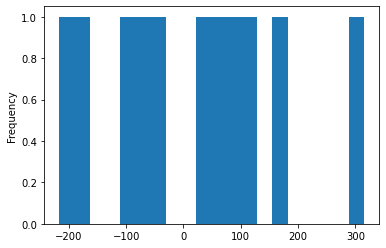

In [59]:
chart['residuals'].plot(kind='hist', bins=20)

In [60]:
chart.corr()

,residuals,y_pred
residuals,1.000000,-0.066935
y_pred,-0.066935,1.000000


В данном случае остатки не хаотичны, связи почти нет, распределение похоже на равномерное. Вероятно эта модель все же не подходит для таких данных.